<a href="https://colab.research.google.com/github/gnatnib/world_happiness_report/blob/main/world_happiness_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**KMeans Clustering World Happiness Report**

*   Bintang Syafrian Rizal - 24060122120031
*   Hanif Herofa           - 24060122120015
*   Raka Maulana Yusuf     - 24060122140119
*   Muhammad Mirza Faiz R. - 24060122140127

**Kaggle: https://www.kaggle.com/datasets/unsdsn/world-happiness/data**


#**Import Library**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#**Load Data dan Melihat Dataset**

In [2]:
df = pd.read_csv('/content/2019.csv')
original=df.copy()

In [3]:
df.head(10)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [4]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [5]:
def highlight_max(s):
  is_max = s == s.max()
  return ['background-color: green' if v else '' for v in is_max]

df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000


In [6]:
df.shape

(156, 9)

In [7]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_df = df[numeric_columns]

#**Correlation Matrix**

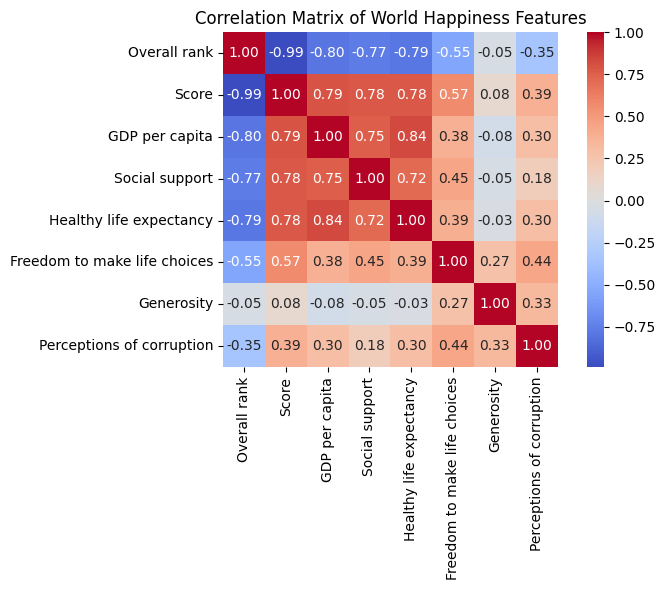

In [8]:
cmat = numeric_df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(cmat,
            annot=True,
            cmap='coolwarm',
            square=True,
            fmt='.2f'
            )
plt.title('Correlation Matrix of World Happiness Features')
plt.tight_layout()
plt.show()

In [9]:
print("\nNumeric columns in the dataset:")
print(numeric_columns.tolist())


Numeric columns in the dataset:
['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']


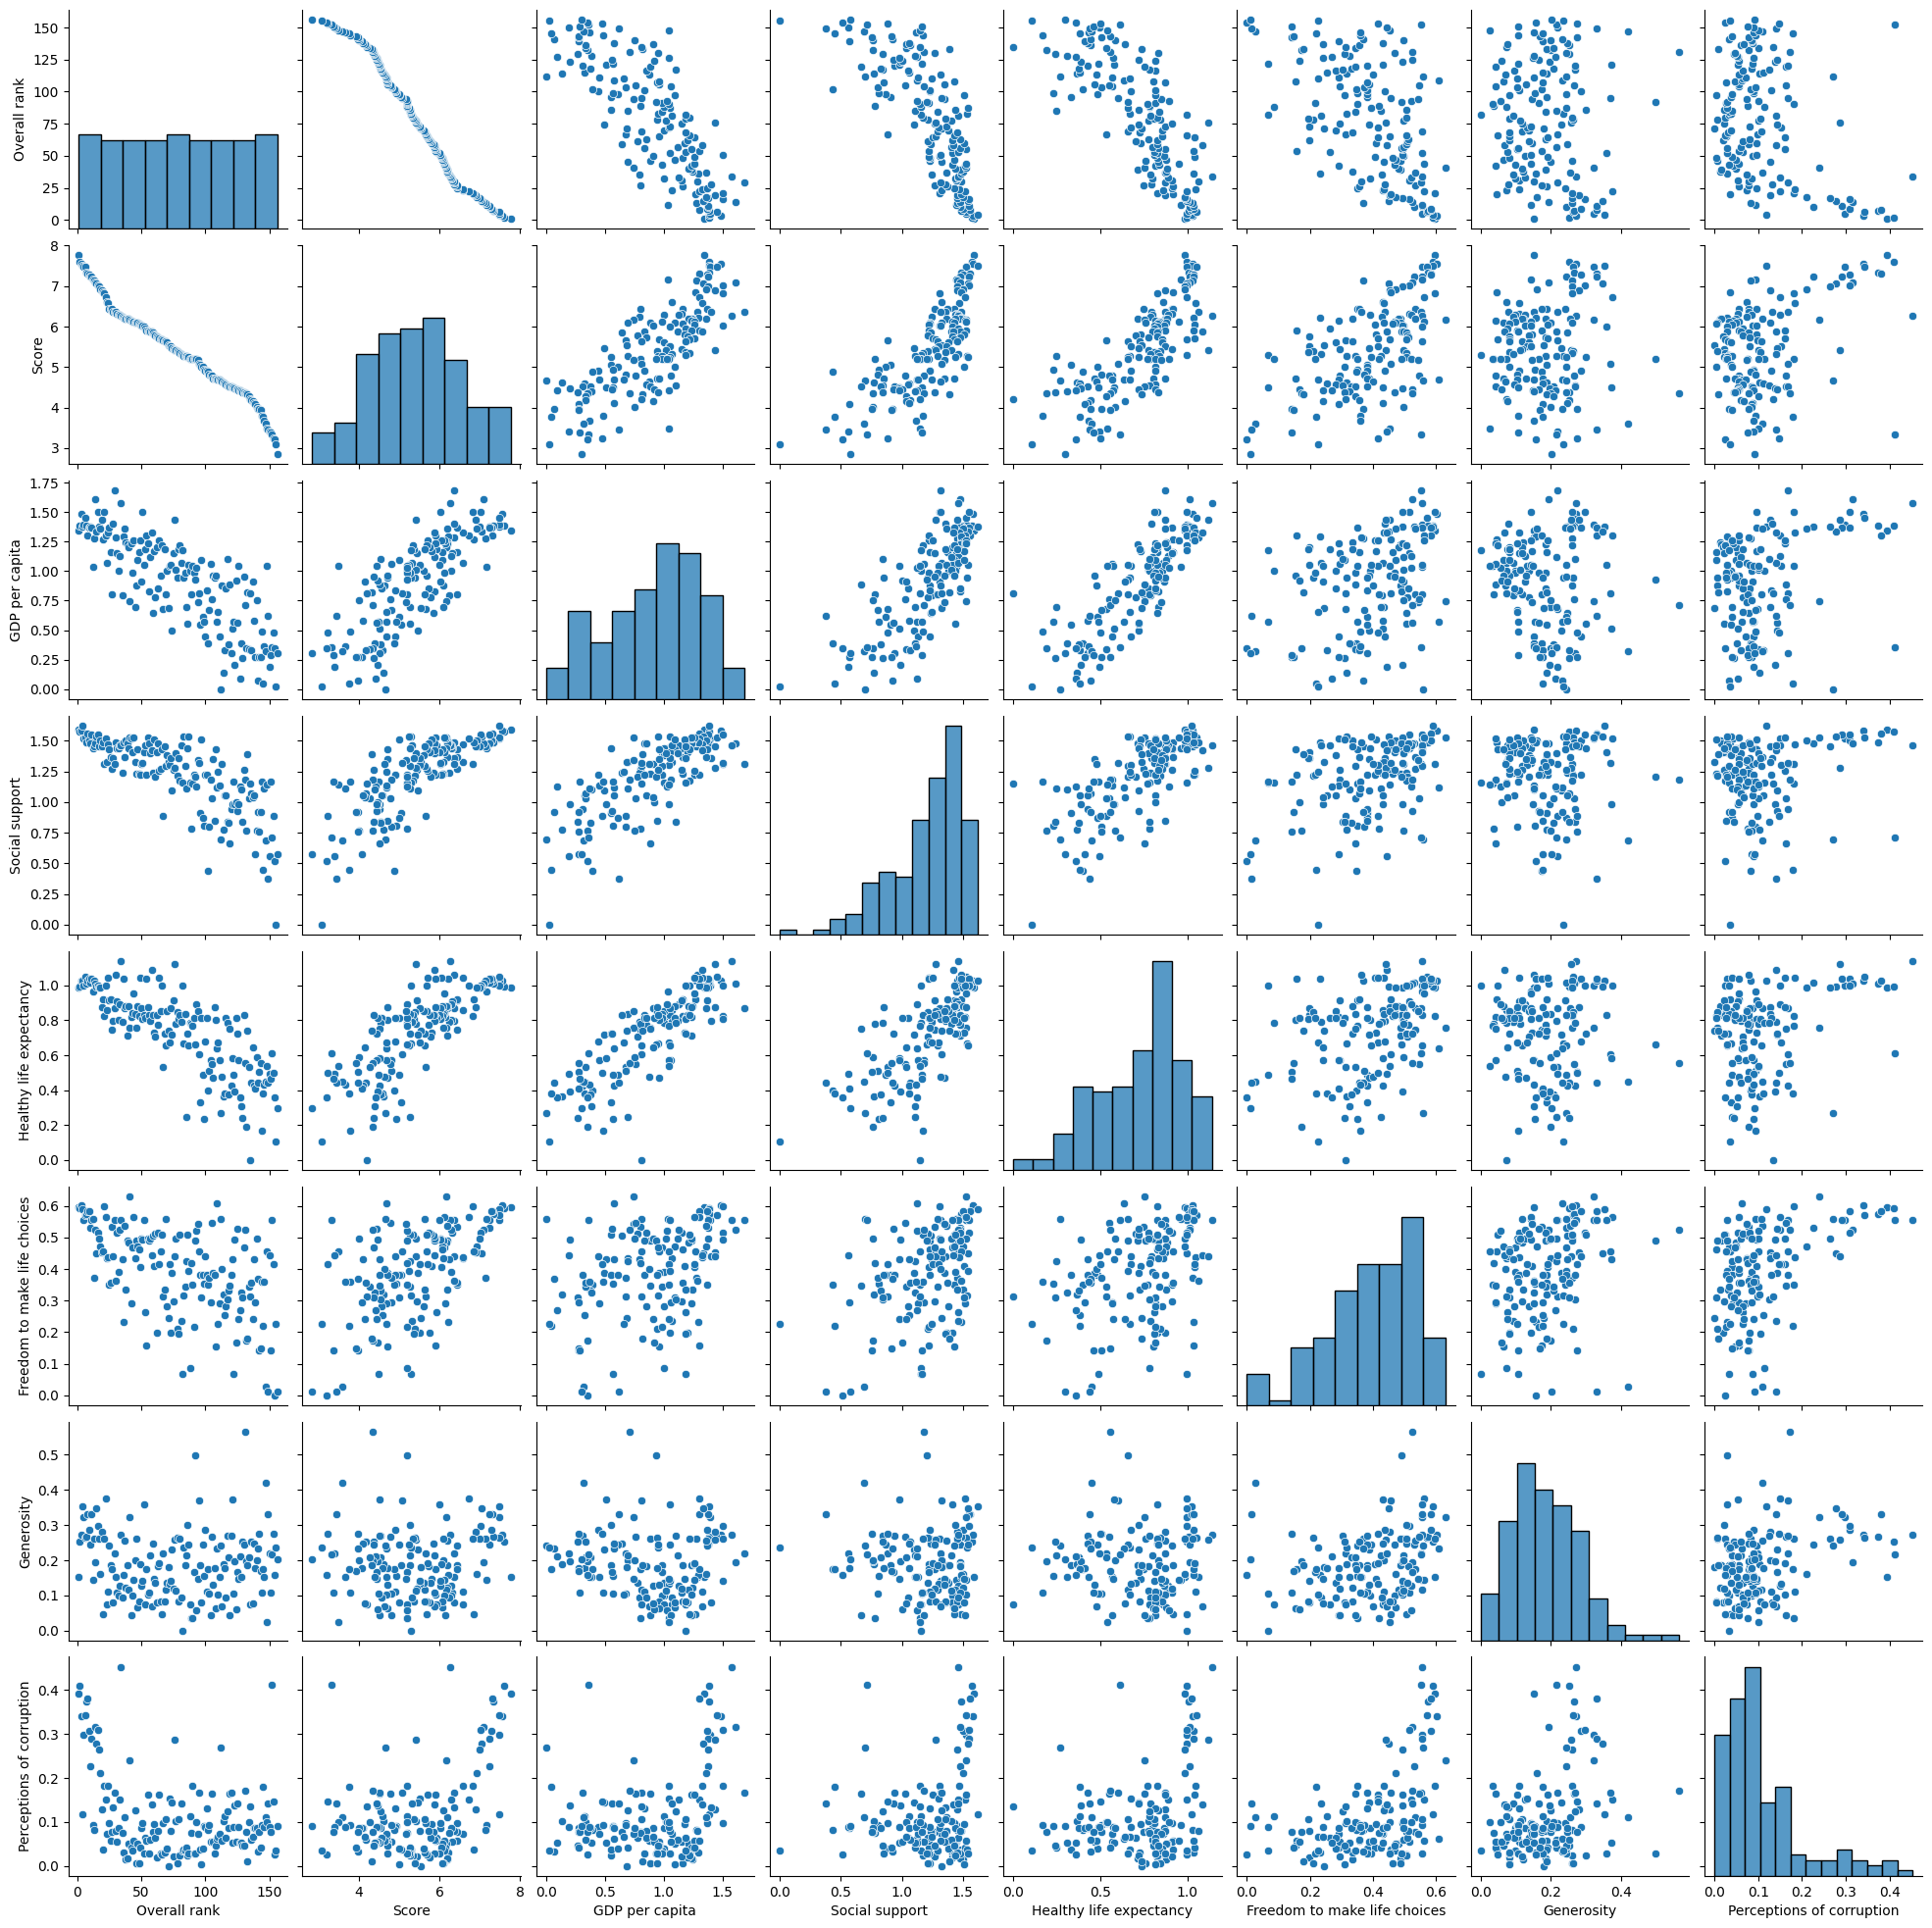

In [10]:
sns.pairplot(df)

#**Melihat Klasemen Negara Berdasarkan Statistik**

<ipython-input-11-e06374cd80b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")
<ipython-input-11-e06374cd80b5>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")
<ipython-input-11-e06374cd80b5>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life

<Axes: xlabel='Freedom to make life choices', ylabel='Country or region'>

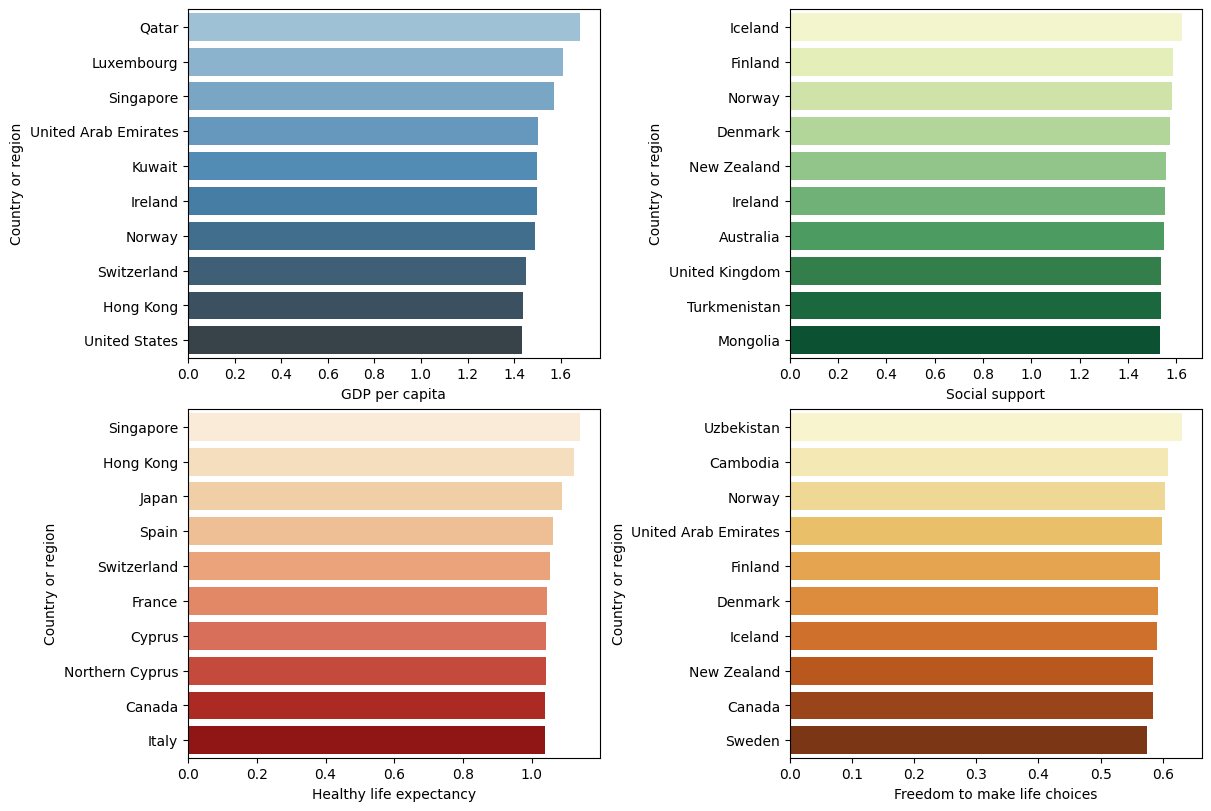

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True,figsize=(12,8))

sns.barplot(x='GDP per capita',y='Country or region',data=df.nlargest(10,'GDP per capita'),ax=axes[0,0],palette="Blues_d")

sns.barplot(x='Social support' ,y='Country or region',data=df.nlargest(10,'Social support'),ax=axes[0,1],palette="YlGn")

sns.barplot(x='Healthy life expectancy' ,y='Country or region',data=df.nlargest(10,'Healthy life expectancy'),ax=axes[1,0],palette='OrRd')

sns.barplot(x='Freedom to make life choices' ,y='Country or region',data=df.nlargest(10,'Freedom to make life choices'),ax=axes[1,1],palette='YlOrBr')

<ipython-input-12-854bbb9f15af>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
<ipython-input-12-854bbb9f15af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')


<Axes: xlabel='Perceptions of corruption', ylabel='Country or region'>

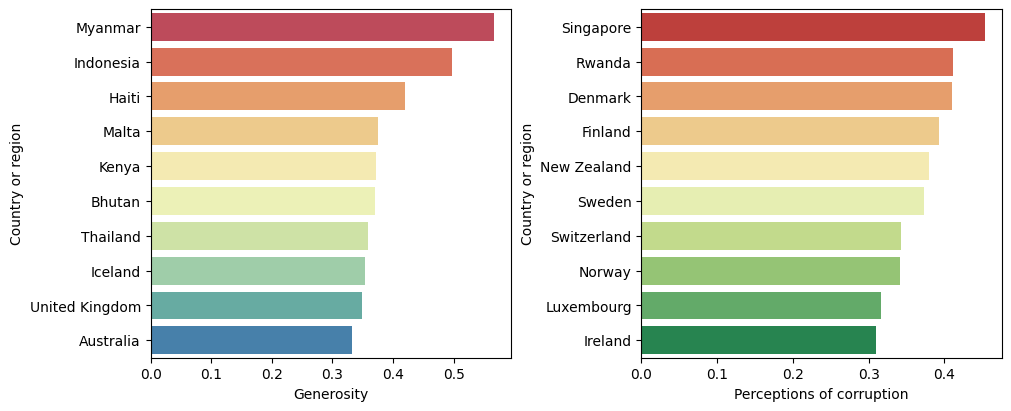

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2,constrained_layout=True,figsize=(10,4))

sns.barplot(x='Generosity' ,y='Country or region',data=df.nlargest(10,'Generosity'),ax=axes[0],palette='Spectral')
sns.barplot(x='Perceptions of corruption' ,y='Country or region',data=df.nlargest(10,'Perceptions of corruption'),ax=axes[1],palette='RdYlGn')

In [13]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
add=df['Score'].max()-df['Score'].min()
grp=round(add/3,3)
print('range difference:',(grp))

max: 7.769
min: 2.853
range difference: 1.639


In [14]:
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',low)
print('upper bound of Mid grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

upper bound of Low grp 4.492
upper bound of Mid grp 6.131
upper bound of High grp max: 7.769


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


In [16]:
category=[]
for i in df.Score:
    if(i>0 and i<low):
        category.append('Low')


    elif(i>low and i<mid):
         category.append('Mid')
    else:
         category.append('High')

df['Category']=category

In [17]:
color = (df.Category == 'High' ).map({True: 'background-color: limegreen',False:'background-color: red'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
0,1,Finland,7.769000,1.340000,1.587000,0.986000,0.596000,0.153000,0.393000,High
1,2,Denmark,7.600000,1.383000,1.573000,0.996000,0.592000,0.252000,0.410000,High
2,3,Norway,7.554000,1.488000,1.582000,1.028000,0.603000,0.271000,0.341000,High
3,4,Iceland,7.494000,1.380000,1.624000,1.026000,0.591000,0.354000,0.118000,High
4,5,Netherlands,7.488000,1.396000,1.522000,0.999000,0.557000,0.322000,0.298000,High
5,6,Switzerland,7.480000,1.452000,1.526000,1.052000,0.572000,0.263000,0.343000,High
6,7,Sweden,7.343000,1.387000,1.487000,1.009000,0.574000,0.267000,0.373000,High
7,8,New Zealand,7.307000,1.303000,1.557000,1.026000,0.585000,0.330000,0.380000,High
8,9,Canada,7.278000,1.365000,1.505000,1.039000,0.584000,0.285000,0.308000,High
9,10,Austria,7.246000,1.376000,1.475000,1.016000,0.532000,0.244000,0.226000,High


#**Melihat Statistik Indonesia Dibandingkan Negara Lain**

In [18]:
df.loc[df['Country or region']=='Indonesia']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
91,92,Indonesia,5.192,0.931,1.203,0.66,0.491,0.498,0.028,Mid


In [19]:
df.loc[df['Country or region']=='United States']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.28,0.128,High


In [20]:
df.loc[df['Country or region']=='Canada']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High


In [21]:
df.loc[df['Country or region']=='United Kingdom']

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.45,0.348,0.278,High


In [22]:
d= df[(df['Country or region'].isin(['Indonesia','Canada','United Kingdom', 'United States']))]
d

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Category
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,High
14,15,United Kingdom,7.054,1.333,1.538,0.996,0.450,0.348,0.278,High
18,19,United States,6.892,1.433,1.457,0.874,0.454,0.280,0.128,High
91,92,Indonesia,5.192,0.931,1.203,0.660,0.491,0.498,0.028,Mid


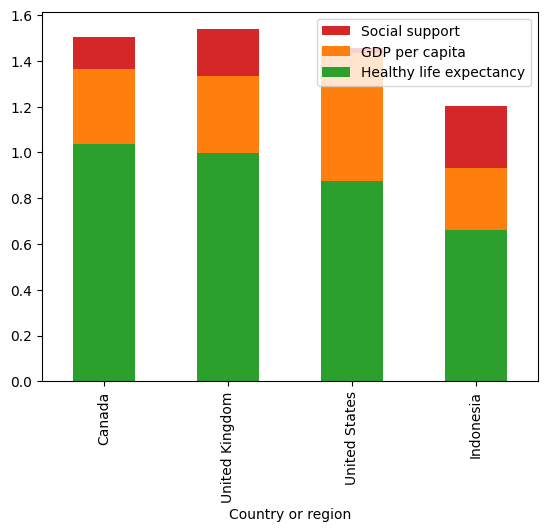

In [23]:
ax = d.plot(y="Social support", x="Country or region", kind="bar",color='C3')
d.plot(y="GDP per capita", x="Country or region", kind="bar", ax=ax, color="C1")
d.plot(y="Healthy life expectancy", x="Country or region", kind="bar", ax=ax, color="C2")

plt.show()

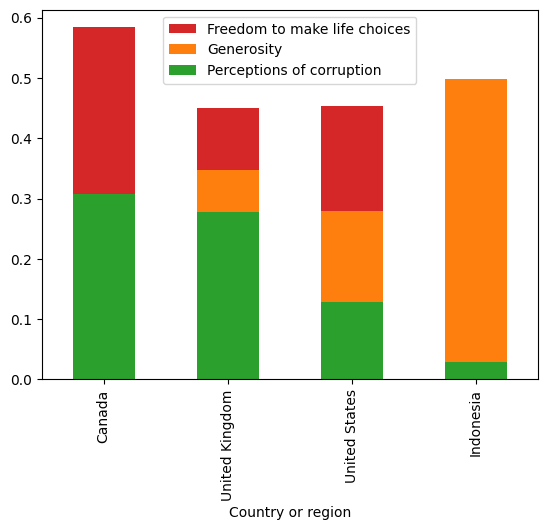

In [24]:
ax = d.plot(y="Freedom to make life choices", x="Country or region", kind="bar",color='C3')
d.plot(y="Generosity", x="Country or region", kind="bar", ax=ax, color="C1",)
d.plot(y="Perceptions of corruption", x="Country or region", kind="bar", ax=ax, color="C2",)

plt.show()

#**World Happiness Index Globe**

In [25]:
import plotly.graph_objs as go
from plotly.offline import iplot

data = dict(type = 'choropleth',
           locations = df['Country or region'],
           locationmode = 'country names',
           colorscale='RdYlGn',
           z = df['Score'],
           text = df['Country or region'],
           colorbar = {'title':'Happiness Score'})

layout = dict(title = 'Geographical Visualization of Happiness Score',
              geo = dict(showframe = True, projection = {'type': 'azimuthal equal area'}))

choromap3 = go.Figure(data = [data], layout=layout)
iplot(choromap3)

#**Import Data 2015 - 2018 Untuk Comparing and Growth**

In [26]:
df15=pd.read_csv('/content/2015.csv')
df16=pd.read_csv('/content/2016.csv')
df17=pd.read_csv('/content/2017.csv')
df18=pd.read_csv('/content/2018.csv')

In [27]:
df15.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [28]:
df16.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [29]:
df17.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [30]:
df18.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


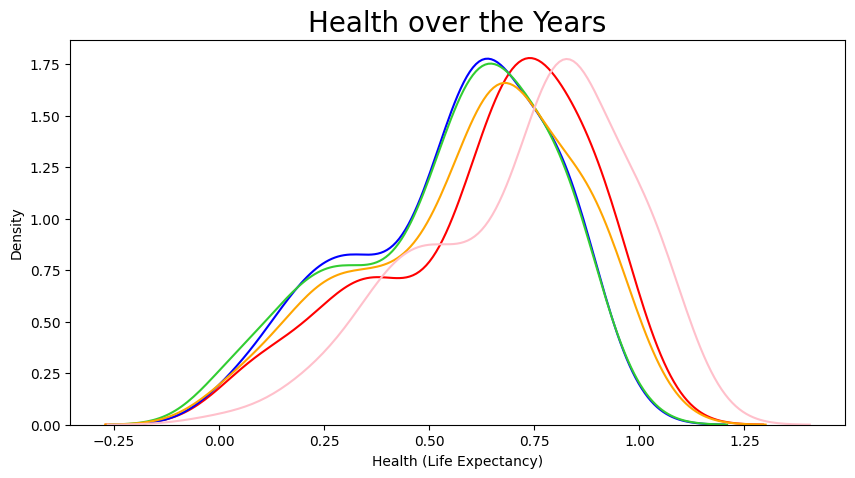

In [31]:
plt.figure(figsize=(10,5))
sns.kdeplot(df15['Health (Life Expectancy)'],color='red')
sns.kdeplot(df16['Health (Life Expectancy)'],color='blue')
sns.kdeplot(df17['Health..Life.Expectancy.'],color='limegreen')
sns.kdeplot(df18['Healthy life expectancy'],color='orange')
sns.kdeplot(df['Healthy life expectancy'],color='pink')
plt.title('Health over the Years',size=20)
plt.show()

In [32]:
print("2015 columns:", df15.columns.tolist())
print("2016 columns:", df16.columns.tolist())
print("2017 columns:", df17.columns.tolist())
print("2018 columns:", df18.columns.tolist())
print("2019 columns:", df.columns.tolist())

2015 columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2016 columns: ['Country', 'Region', 'Happiness Rank', 'Happiness Score', 'Lower Confidence Interval', 'Upper Confidence Interval', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']
2017 columns: ['Country', 'Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Generosity', 'Trust..Government.Corruption.', 'Dystopia.Residual']
2018 columns: ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2019 columns: ['Overall rank', 'Country or region'

In [33]:
df18['Year']='2018'
df['Year']='2019'
df15['Year']='2015'
df16['Year']='2016'
df17['Year']='2017'

In [34]:
df.rename(columns={'Country or region':'Country'}, inplace=True)
data1 = df.filter(['Country', 'GDP per capita', 'Year'], axis=1)

df15.rename(columns={'Economy (GDP per Capita)':'GDP per capita'}, inplace=True)
data2 = df15.filter(['Country', 'GDP per capita', 'Year'], axis=1)

df16.rename(columns={'Economy (GDP per Capita)':'GDP per capita'}, inplace=True)
data3 = df16.filter(['Country', 'GDP per capita', 'Year'], axis=1)

df17.rename(columns={'Economy..GDP.per.Capita.':'GDP per capita'}, inplace=True)
data4 = df17.filter(['Country', 'GDP per capita', 'Year'], axis=1)

df18.rename(columns={'Country or region':'Country'}, inplace=True)
data5 = df18.filter(['Country', 'GDP per capita', 'Year'], axis=1)

# Combine all dataframes
combined_data = pd.concat([data2, data3, data4, data5, data1], ignore_index=True)

In [35]:
print("\nShape of combined data:", combined_data.shape)
print("\nFirst few rows of combined data:")
print(combined_data.head())


Shape of combined data: (782, 3)

First few rows of combined data:
       Country  GDP per capita  Year
0  Switzerland         1.39651  2015
1      Iceland         1.30232  2015
2      Denmark         1.32548  2015
3       Norway         1.45900  2015
4       Canada         1.32629  2015


In [36]:
# Create a summary of GDP per capita by year
yearly_summary = combined_data.groupby('Year')['GDP per capita'].describe()
print("\nYearly Summary Statistics:")
print(yearly_summary)


Yearly Summary Statistics:
      count      mean       std  min       25%       50%       75%       max
Year                                                                        
2015  158.0  0.846137  0.403121  0.0  0.545808  0.910245  1.158448  1.690420
2016  157.0  0.953880  0.412595  0.0  0.670240  1.027800  1.279640  1.824270
2017  155.0  0.984718  0.420793  0.0  0.663371  1.064578  1.318027  1.870766
2018  156.0  0.891449  0.391921  0.0  0.616250  0.949500  1.197750  2.096000
2019  156.0  0.905147  0.398389  0.0  0.602750  0.960000  1.232500  1.684000


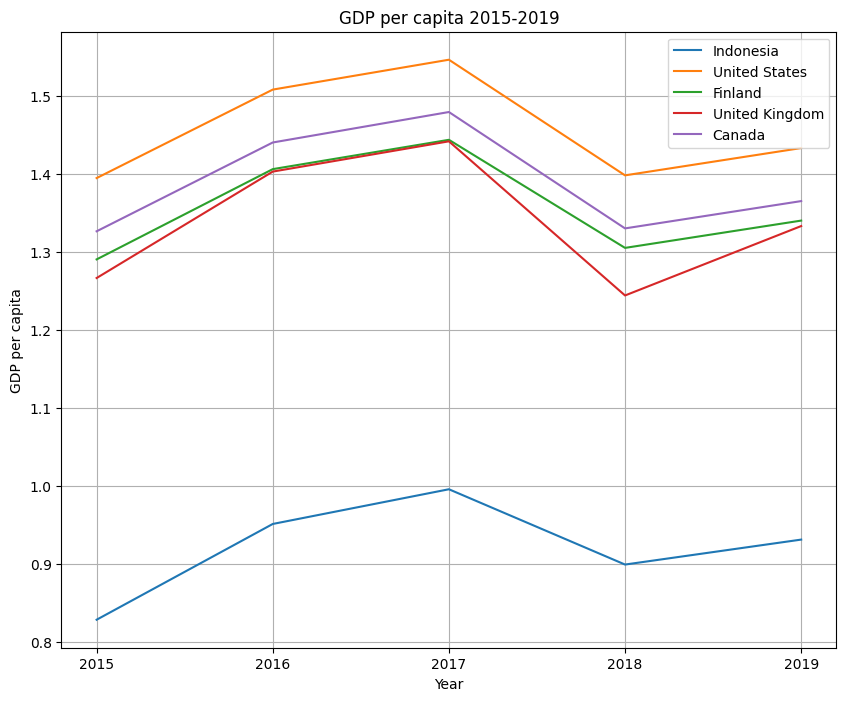


Data for Indonesia:
       Country  GDP per capita  Year
73   Indonesia        0.828270  2015
236  Indonesia        0.951040  2016
395  Indonesia        0.995539  2017
565  Indonesia        0.899000  2018
717  Indonesia        0.931000  2019

Data for United States:
           Country  GDP per capita  Year
14   United States        1.394510  2015
170  United States        1.507960  2016
328  United States        1.546259  2017
487  United States        1.398000  2018
644  United States        1.433000  2019

Data for Finland:
     Country  GDP per capita  Year
5    Finland        1.290250  2015
162  Finland        1.405980  2016
319  Finland        1.443572  2017
470  Finland        1.305000  2018
626  Finland        1.340000  2019

Data for United Kingdom:
            Country  GDP per capita  Year
20   United Kingdom        1.266370  2015
180  United Kingdom        1.402830  2016
333  United Kingdom        1.441634  2017
480  United Kingdom        1.244000  2018
640  United Kingdom  

In [37]:
# Create figure
plt.figure(figsize=(10,8))

# Filter and plot for each country
countries = ['Indonesia', 'United States', 'Finland', 'United Kingdom', 'Canada']

for country in countries:
    # Filter data for each country
    country_data = combined_data[combined_data['Country'] == country]
    plt.plot(country_data['Year'], country_data['GDP per capita'], label=country)

# Customize the plot
plt.title('GDP per capita 2015-2019')
plt.xlabel('Year')
plt.ylabel('GDP per capita')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

for country in countries:
    print(f"\nData for {country}:")
    country_data = combined_data[combined_data['Country'] == country]
    print(country_data.sort_values('Year'))

#**Heatmap Top 10 Negara Berdasarkan GDP Per Capita**

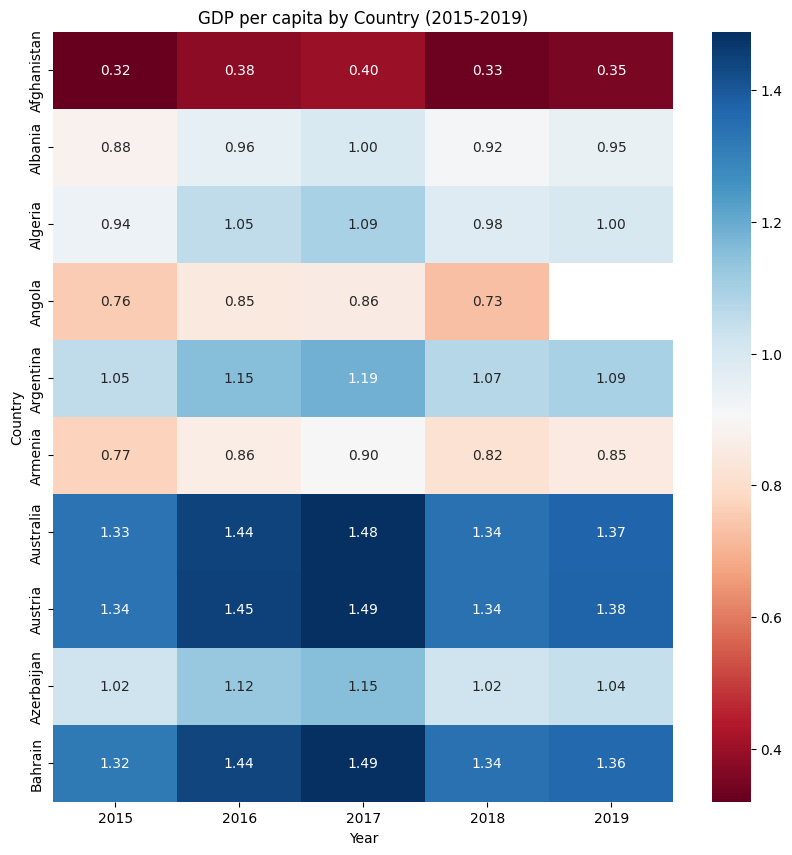


Pivot table data:
Year            2015     2016      2017   2018   2019
Country                                              
Afghanistan  0.31982  0.38227  0.401477  0.332  0.350
Albania      0.87867  0.95530  0.996193  0.916  0.947
Algeria      0.93929  1.05266  1.091864  0.979  1.002
Angola       0.75778  0.84731  0.858428  0.730    NaN
Argentina    1.05351  1.15137  1.185295  1.073  1.092
Armenia      0.76821  0.86086  0.900597  0.816  0.850
Australia    1.33358  1.44443  1.484415  1.340  1.372
Austria      1.33723  1.45038  1.487097  1.341  1.376
Azerbaijan   1.02389  1.12373  1.153602  1.024  1.043
Bahrain      1.32376  1.44024  1.488412  1.338  1.362


In [38]:
data2015 = df15[['Country', 'GDP per capita']].copy()
data2015['Year'] = 2015

data2016 = df16[['Country', 'GDP per capita']].copy()
data2016['Year'] = 2016

data2017 = df17[['Country', 'GDP per capita']].copy()
data2017['Year'] = 2017

data2018 = df18[['Country', 'GDP per capita']].copy()
data2018['Year'] = 2018

data2019 = df[['Country', 'GDP per capita']].copy()
data2019['Year'] = 2019

# gabung data tiap tahun
data_all = pd.concat([data2015, data2016, data2017, data2018, data2019], ignore_index=True)

# pivot table
plt.figure(figsize=(10, 10))
heatmap_data = pd.pivot_table(data_all,
                             values='GDP per capita',
                             index=['Country'],
                             columns='Year')

# top 10 countries
heatmap_data = heatmap_data.head(10)

# heatmap
sns.heatmap(heatmap_data,
            cmap="RdBu",
            annot=True,  # Show values
            fmt='.2f',   # Format to 2 decimal places
            center=None) # Center the colormap

plt.title('GDP per capita by Country (2015-2019)')
plt.xlabel('Year')
plt.ylabel('Country')

plt.show()

# Print the pivot table to verify data
print("\nPivot table data:")
print(heatmap_data)

#**Pre Processing Data**

In [39]:
original=original.drop(['Country or region','Overall rank'],axis=1)

#**Normalisasi Data**

In [40]:
from sklearn.preprocessing import normalize
data_scaled = normalize(original)
data_scaled = pd.DataFrame(data_scaled, columns=original.columns)
datasc=data_scaled.copy()
data_scaled.head()

,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,0.955020,0.164722,0.195085,0.121206,0.073264,0.018808,0.048310
1,0.952077,0.173253,0.197055,0.124772,0.074162,0.031569,0.051362
2,0.948783,0.186893,0.198699,0.129117,0.075737,0.034038,0.042830
3,0.949879,0.174918,0.205845,0.130048,0.074910,0.044870,0.014957
4,0.952236,0.177527,0.193550,0.127041,0.070833,0.040948,0.037896


In [41]:
print(datasc.head())

      Score  GDP per capita  Social support  Healthy life expectancy  \
0  0.955020        0.164722        0.195085                 0.121206   
1  0.952077        0.173253        0.197055                 0.124772   
2  0.948783        0.186893        0.198699                 0.129117   
3  0.949879        0.174918        0.205845                 0.130048   
4  0.952236        0.177527        0.193550                 0.127041   

   Freedom to make life choices  Generosity  Perceptions of corruption  
0                      0.073264    0.018808                   0.048310  
1                      0.074162    0.031569                   0.051362  
2                      0.075737    0.034038                   0.042830  
3                      0.074910    0.044870                   0.014957  
4                      0.070833    0.040948                   0.037896  


#**Standarisasi Data dan PCA**

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

numeric_features = ['Score', 'GDP per capita', 'Social support',
                   'Healthy life expectancy', 'Freedom to make life choices',
                   'Generosity', 'Perceptions of corruption']

# Create feature matrix
X = df[numeric_features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

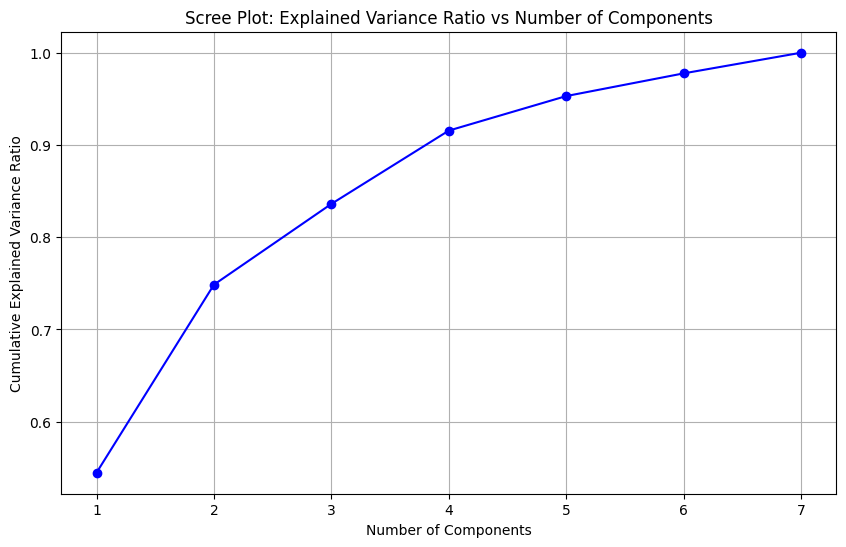

In [43]:
# Create scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1),
         np.cumsum(explained_variance_ratio),
         'bo-')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Scree Plot: Explained Variance Ratio vs Number of Components')
plt.grid(True)
plt.show()

In [44]:
# Print explained variance ratio for each component
print("\nExplained variance ratio by component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.3f} ({ratio*100:.1f}%)")


Explained variance ratio by component:
PC1: 0.545 (54.5%)
PC2: 0.204 (20.4%)
PC3: 0.088 (8.8%)
PC4: 0.079 (7.9%)
PC5: 0.037 (3.7%)
PC6: 0.025 (2.5%)
PC7: 0.022 (2.2%)


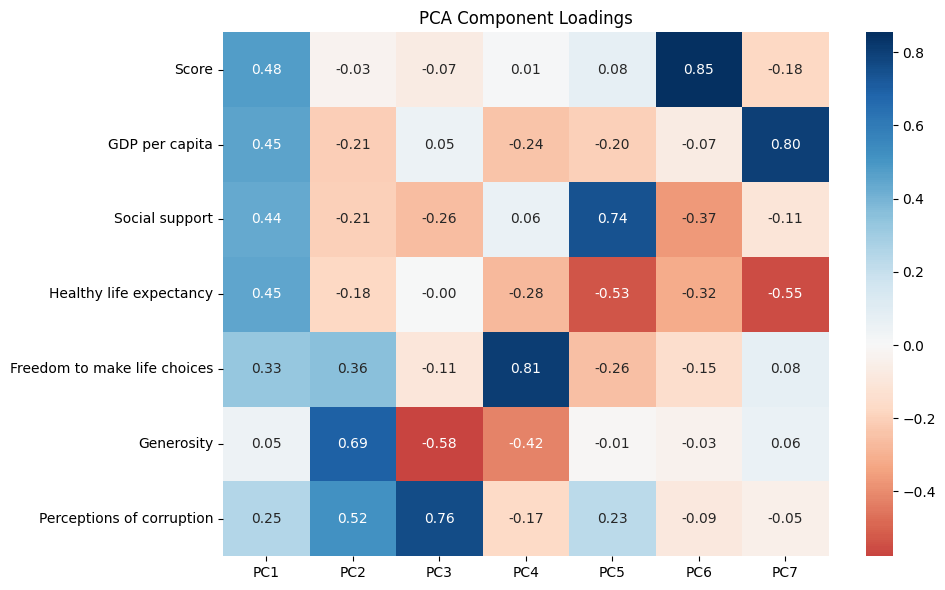


Feature importance (absolute values) for first two components:

PC1 feature importance:
Score                           0.475861
GDP per capita                  0.454825
Healthy life expectancy         0.450150
Social support                  0.436582
Freedom to make life choices    0.332201
Perceptions of corruption       0.246511
Generosity                      0.048233
Name: PC1, dtype: float64

PC2 feature importance:
Generosity                      0.693809
Perceptions of corruption       0.516346
Freedom to make life choices    0.362130
GDP per capita                  0.213377
Social support                  0.207148
Healthy life expectancy         0.177856
Score                           0.028371
Name: PC2, dtype: float64


In [45]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(len(numeric_features))],
    index=numeric_features
)

# Create a heatmap of feature loadings
plt.figure(figsize=(10, 6))
sns.heatmap(loadings,
            annot=True,
            cmap='RdBu',
            center=0,
            fmt='.2f')
plt.title('PCA Component Loadings')
plt.tight_layout()
plt.show()

# Print absolute feature importance for first two components
print("\nFeature importance (absolute values) for first two components:")
pc1_loadings = pd.Series(abs(loadings['PC1']), index=numeric_features)
pc2_loadings = pd.Series(abs(loadings['PC2']), index=numeric_features)

print("\nPC1 feature importance:")
print(pc1_loadings.sort_values(ascending=False))
print("\nPC2 feature importance:")
print(pc2_loadings.sort_values(ascending=False))

#**Elbow Method Untuk K-Means**

In [46]:
# Select features based on PCA loadings
features = ['GDP per capita', 'Social support']

# Create feature matrix for visualization
X = df[features]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=features)

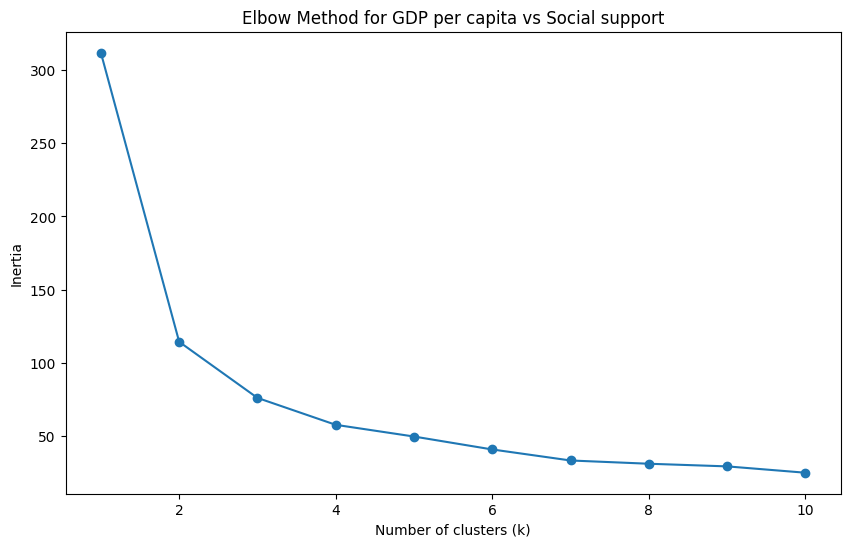

In [47]:
from sklearn.cluster import KMeans

# Elbow method untuk menemukan berapa cluster yang optimal
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title(f'Elbow Method for {features[0]} vs {features[1]}')
plt.show()

#**K-Means Clustering & Silhouette Score**

Silhouette Score: 0.427


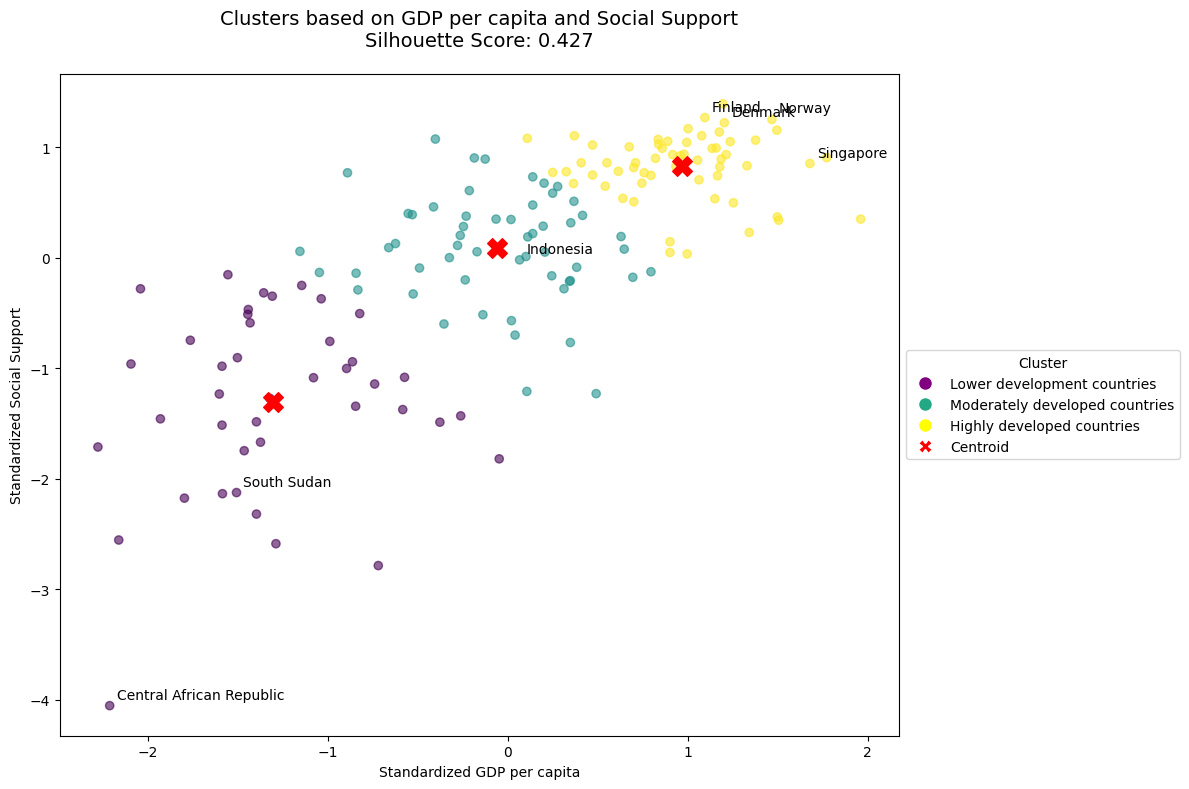

In [48]:
# Perform K-means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Calculate silhouette score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg:.3f}')

# Create a mapping to ensure high values get yellow color
cluster_means = pd.DataFrame(X_scaled).groupby(clusters).mean().mean(axis=1)
cluster_mapping = pd.Series(range(3), index=cluster_means.argsort())
mapped_clusters = cluster_mapping[clusters]

# Start your visualization with all the scatter plots
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_scaled[features[0]],
                     X_scaled[features[1]],
                     c=mapped_clusters,
                     cmap='viridis',
                     alpha=0.6)

# Plot centroids
centroids = kmeans.cluster_centers_
centroid_scatter = plt.scatter(centroids[:, 0],
                             centroids[:, 1],
                             c='red',
                             marker='X',
                             s=200,
                             label='Centroids')

# Add labels for some key countries
for idx, row in df.iterrows():
    if row['Country'] in ['Singapore','Finland', 'Denmark', 'Norway', 'South Sudan', 'Central African Republic', 'Indonesia']:
        plt.annotate(row['Country'],
                    (X_scaled.iloc[idx, 0], X_scaled.iloc[idx, 1]),
                    xytext=(5, 5),
                    textcoords='offset points')

# Update title to include silhouette score
plt.title(f'Clusters based on GDP per capita and Social Support\nSilhouette Score: {silhouette_avg:.3f}',
         pad=20,
         size=14)

# Rest of your visualization code remains the same
plt.xlabel('Standardized GDP per capita')
plt.ylabel('Standardized Social Support')

# Create simpler legend
legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='purple',
                            label='Lower development countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='#22A884FF',
                            label='Moderately developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='yellow',
                            label='Highly developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='X', color='w',
                            markerfacecolor='red',
                            label='Centroid',
                            markersize=10)]

plt.legend(handles=legend_elements,
          title='Cluster',
          loc='center left',
          bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [49]:
# Score vs GDP per capita clustering
features2 = ['Score', 'GDP per capita']
X2 = df[features2]

# First do elbow method
scaler2 = StandardScaler()
X2_scaled = scaler2.fit_transform(X2)
X2_scaled = pd.DataFrame(X2_scaled, columns=features2)


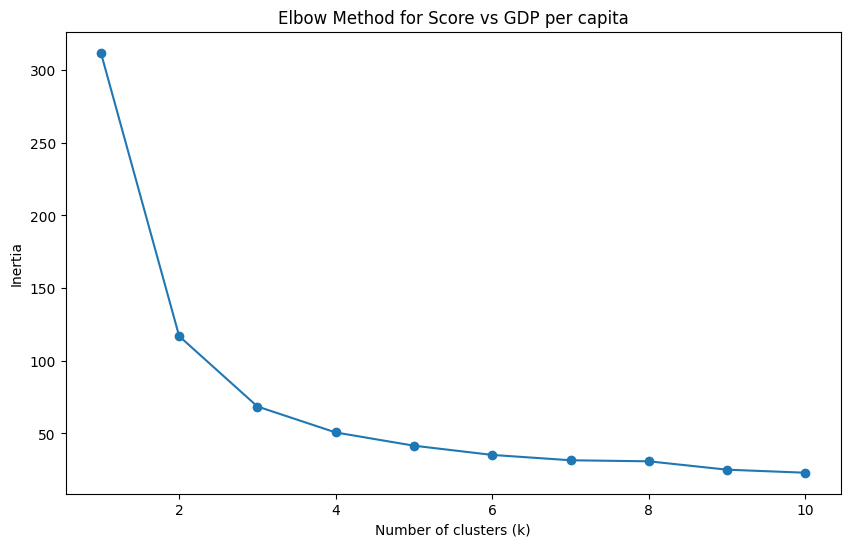

In [50]:
# Elbow method
inertias2 = []
for k in range(1, 11):
    kmeans2_temp = KMeans(n_clusters=k, random_state=42)
    kmeans2_temp.fit(X2_scaled)
    inertias2.append(kmeans2_temp.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias2, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title(f'Elbow Method for {features2[0]} vs {features2[1]}')
plt.show()


Silhouette Score: 0.447


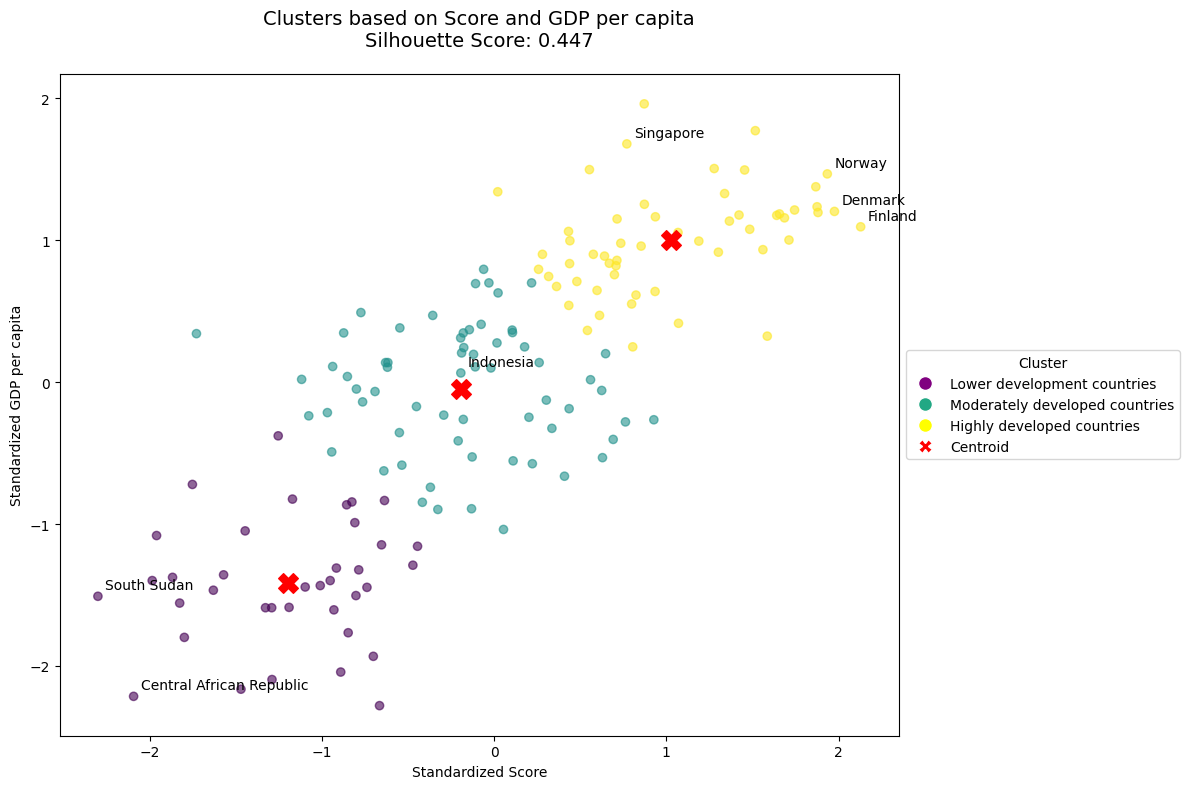

In [51]:
# Perform K-means
kmeans2 = KMeans(n_clusters=3, random_state=42)
clusters2 = kmeans2.fit_predict(X2_scaled)

# Calculate silhouette score
silhouette_avg2 = silhouette_score(X2_scaled, clusters2)
print(f'Silhouette Score: {silhouette_avg2:.3f}')

# Create a mapping to ensure high values get yellow color
cluster_means2 = pd.DataFrame(X2_scaled).groupby(clusters2).mean().mean(axis=1)
cluster_mapping2 = pd.Series(range(3), index=cluster_means2.argsort())
mapped_clusters2 = cluster_mapping2[clusters2]

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X2_scaled[features2[0]],
                     X2_scaled[features2[1]],
                     c=mapped_clusters2,
                     cmap='viridis',
                     alpha=0.6)

# Plot centroids
centroids2 = kmeans2.cluster_centers_
centroid_scatter = plt.scatter(centroids2[:, 0],
                             centroids2[:, 1],
                             c='red',
                             marker='X',
                             s=200,
                             label='Centroids')

# Add labels for key countries
for idx, row in df.iterrows():
    if row['Country'] in ['Singapore','Finland', 'Denmark', 'Norway', 'South Sudan', 'Central African Republic', 'Indonesia']:
        plt.annotate(row['Country'],
                    (X2_scaled.iloc[idx, 0], X2_scaled.iloc[idx, 1]),
                    xytext=(5, 5),
                    textcoords='offset points')

plt.title(f'Clusters based on Score and GDP per capita\nSilhouette Score: {silhouette_avg2:.3f}',
         pad=20,
         size=14)
plt.xlabel('Standardized Score')
plt.ylabel('Standardized GDP per capita')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='purple',
                            label='Lower development countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='#22A884FF',
                            label='Moderately developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='yellow',
                            label='Highly developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='X', color='w',
                            markerfacecolor='red',
                            label='Centroid',
                            markersize=10)]

plt.legend(handles=legend_elements,
          title='Cluster',
          loc='center left',
          bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [52]:
features3 = ['Social support', 'Healthy life expectancy']
X3 = df[features3]

# Standardize
scaler3 = StandardScaler()
X3_scaled = scaler3.fit_transform(X3)
X3_scaled = pd.DataFrame(X3_scaled, columns=features3)

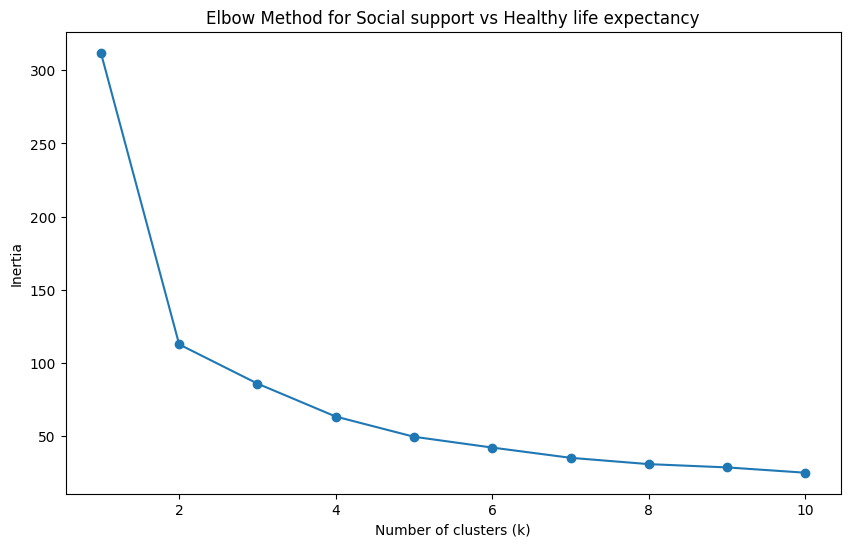

In [53]:
# Elbow method
inertias3 = []
for k in range(1, 11):
    kmeans3_temp = KMeans(n_clusters=k, random_state=42)
    kmeans3_temp.fit(X3_scaled)
    inertias3.append(kmeans3_temp.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias3, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title(f'Elbow Method for {features3[0]} vs {features3[1]}')
plt.show()

Silhouette Score: 0.367


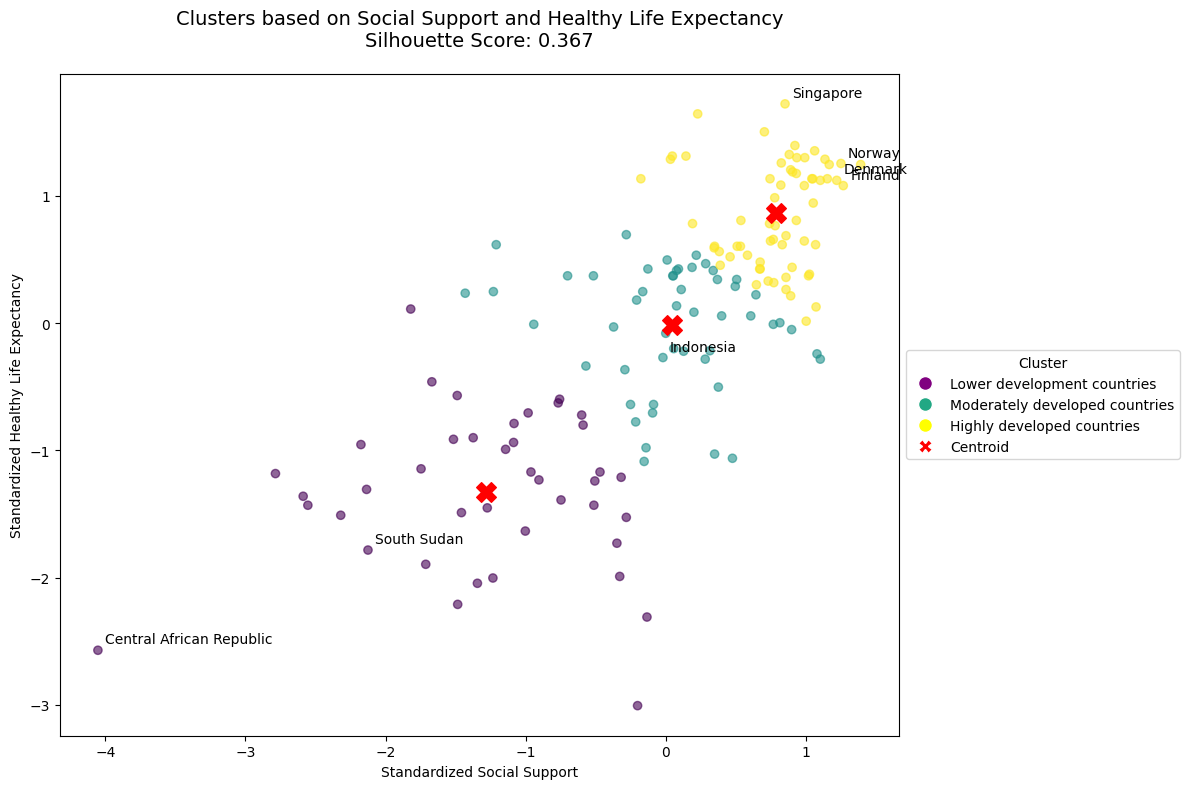

In [54]:
# Perform K-means
kmeans3 = KMeans(n_clusters=3, random_state=42)
clusters3 = kmeans3.fit_predict(X3_scaled)

# Calculate silhouette score
silhouette_avg3 = silhouette_score(X3_scaled, clusters3)
print(f'Silhouette Score: {silhouette_avg3:.3f}')

# Create mapping for colors
cluster_means3 = pd.DataFrame(X3_scaled).groupby(clusters3).mean().mean(axis=1)
cluster_mapping3 = pd.Series(range(3), index=cluster_means3.argsort())
mapped_clusters3 = cluster_mapping3[clusters3]

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X3_scaled[features3[0]],
                     X3_scaled[features3[1]],
                     c=mapped_clusters3,
                     cmap='viridis',
                     alpha=0.6)

# Plot centroids
centroids3 = kmeans3.cluster_centers_
centroid_scatter = plt.scatter(centroids3[:, 0],
                             centroids3[:, 1],
                             c='red',
                             marker='X',
                             s=200,
                             label='Centroids')

# Add labels for key countries
for idx, row in df.iterrows():
    if row['Country'] in ['Singapore','Finland', 'Denmark', 'Norway', 'South Sudan', 'Central African Republic', 'Indonesia']:
        plt.annotate(row['Country'],
                    (X3_scaled.iloc[idx, 0], X3_scaled.iloc[idx, 1]),
                    xytext=(5, 5),
                    textcoords='offset points')

plt.title(f'Clusters based on Social Support and Healthy Life Expectancy\nSilhouette Score: {silhouette_avg3:.3f}',
         pad=20,
         size=14)
plt.xlabel('Standardized Social Support')
plt.ylabel('Standardized Healthy Life Expectancy')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='purple',
                            label='Lower development countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='#22A884FF',
                            label='Moderately developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='yellow',
                            label='Highly developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='X', color='w',
                            markerfacecolor='red',
                            label='Centroid',
                            markersize=10)]

plt.legend(handles=legend_elements,
          title='Cluster',
          loc='center left',
          bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

In [55]:
features4 = ['GDP per capita', 'Healthy life expectancy']
X4 = df[features4]

# Standardize
scaler4 = StandardScaler()
X4_scaled = scaler4.fit_transform(X4)
X4_scaled = pd.DataFrame(X4_scaled, columns=features4)

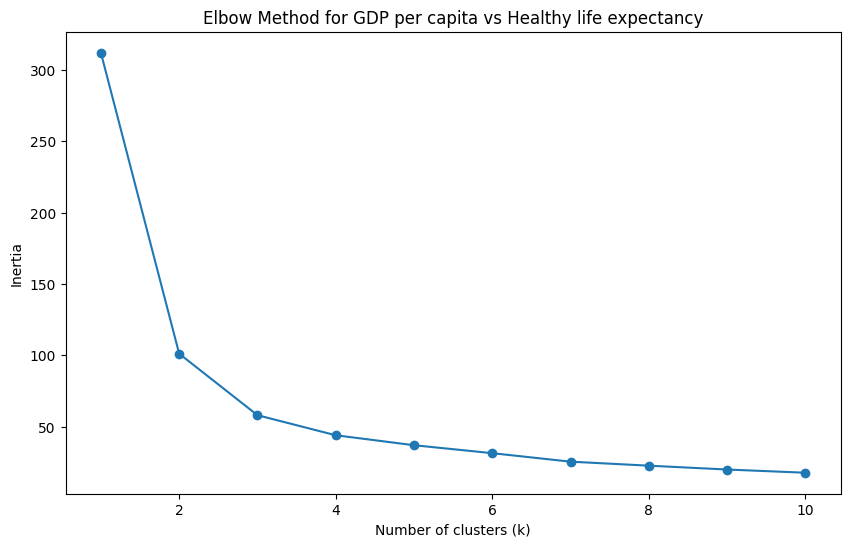

In [56]:
# Elbow method
inertias4 = []
for k in range(1, 11):
    kmeans4_temp = KMeans(n_clusters=k, random_state=42)
    kmeans4_temp.fit(X4_scaled)
    inertias4.append(kmeans4_temp.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias4, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title(f'Elbow Method for {features4[0]} vs {features4[1]}')
plt.show()

Silhouette Score: 0.479


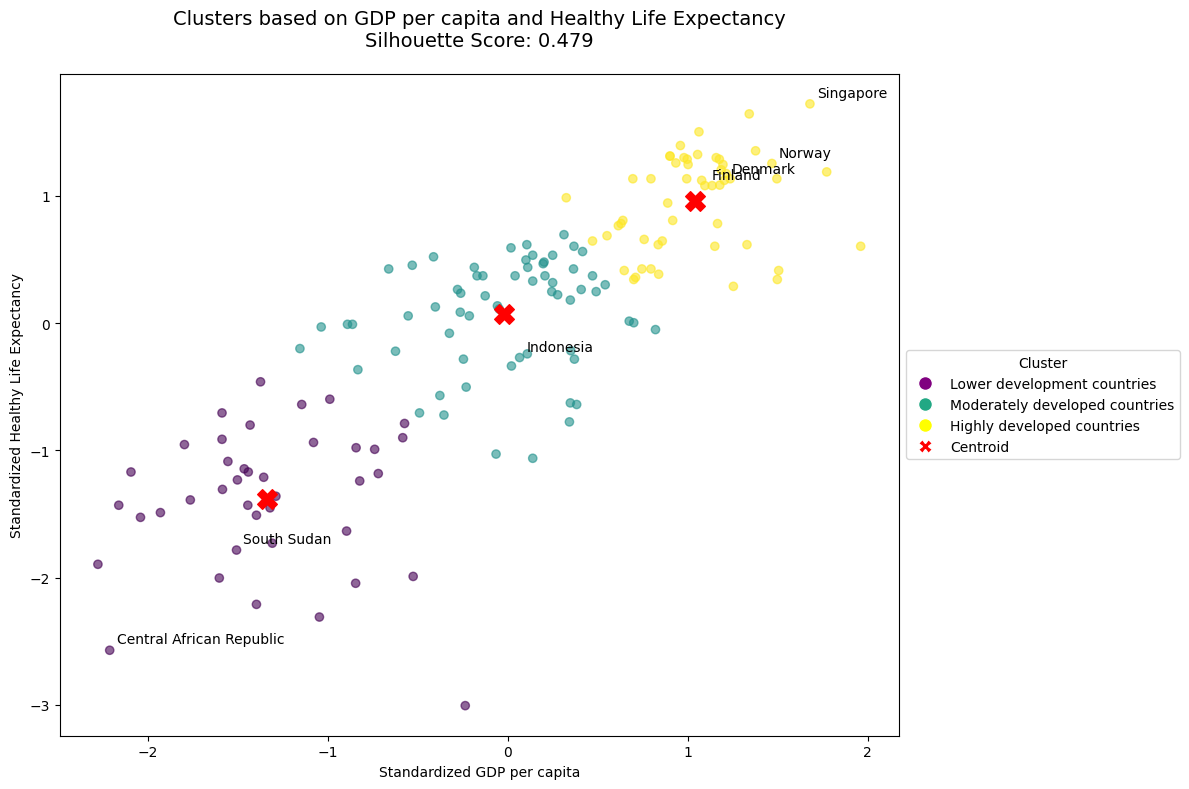

In [57]:
# Perform K-means
kmeans4 = KMeans(n_clusters=3, random_state=42)
clusters4 = kmeans4.fit_predict(X4_scaled)

# Calculate silhouette score
silhouette_avg4 = silhouette_score(X4_scaled, clusters4)
print(f'Silhouette Score: {silhouette_avg4:.3f}')

# Create mapping for colors
cluster_means4 = pd.DataFrame(X4_scaled).groupby(clusters4).mean().mean(axis=1)
cluster_mapping4 = pd.Series(range(3), index=cluster_means4.argsort())
mapped_clusters4 = cluster_mapping4[clusters4]

# Visualization
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X4_scaled[features4[0]],
                     X4_scaled[features4[1]],
                     c=mapped_clusters4,
                     cmap='viridis',
                     alpha=0.6)

# Plot centroids
centroids4 = kmeans4.cluster_centers_
centroid_scatter = plt.scatter(centroids4[:, 0],
                             centroids4[:, 1],
                             c='red',
                             marker='X',
                             s=200,
                             label='Centroids')

# Add labels for key countries
for idx, row in df.iterrows():
    if row['Country'] in ['Singapore','Finland', 'Denmark', 'Norway', 'South Sudan', 'Central African Republic', 'Indonesia']:
        plt.annotate(row['Country'],
                    (X4_scaled.iloc[idx, 0], X4_scaled.iloc[idx, 1]),
                    xytext=(5, 5),
                    textcoords='offset points')

plt.title(f'Clusters based on GDP per capita and Healthy Life Expectancy\nSilhouette Score: {silhouette_avg4:.3f}',
         pad=20,
         size=14)
plt.xlabel('Standardized GDP per capita')
plt.ylabel('Standardized Healthy Life Expectancy')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='purple',
                            label='Lower development countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='#22A884FF',
                            label='Moderately developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='o', color='w',
                            markerfacecolor='yellow',
                            label='Highly developed countries',
                            markersize=10),
                  plt.Line2D([0], [0], marker='X', color='w',
                            markerfacecolor='red',
                            label='Centroid',
                            markersize=10)]

plt.legend(handles=legend_elements,
          title='Cluster',
          loc='center left',
          bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

#**EDA After K-Means Clustering**

In [58]:
cluster_results = {
    'GDP_Social': {
        'features': features,
        'clusters': clusters,
        'silhouette': silhouette_avg
    },
    'Score_GDP': {
        'features': features2,
        'clusters': clusters2,
        'silhouette': silhouette_avg2
    },
    'Social_Health': {
        'features': features3,
        'clusters': clusters3,
        'silhouette': silhouette_avg3
    },
    'GDP_Health': {
        'features': features4,
        'clusters': clusters4,
        'silhouette': silhouette_avg4
    }
}

#**Bandingkan Silhouette Score dari 4 Clustering yang Sudah Dilakukan**

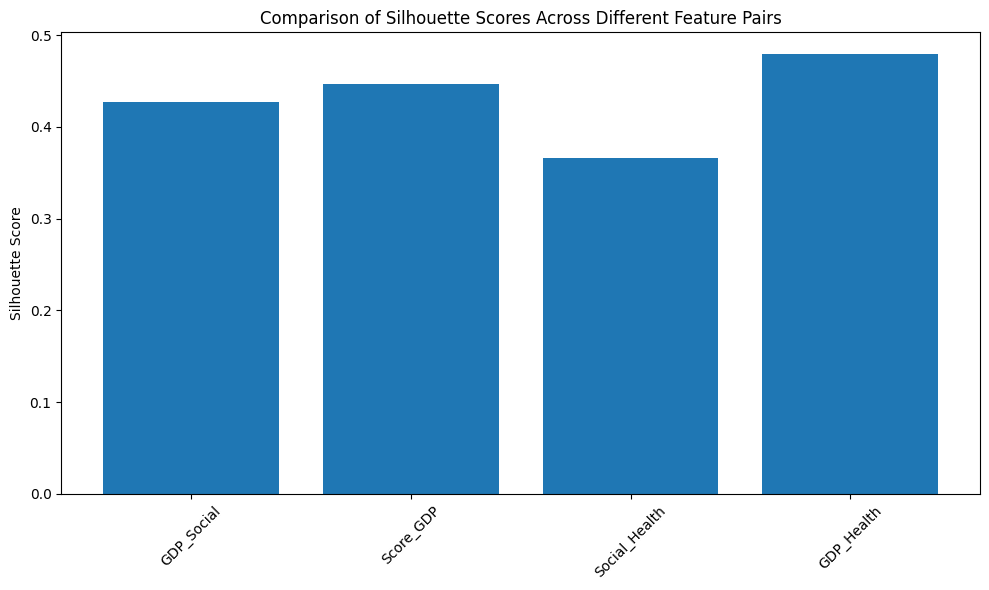

In [59]:
plt.figure(figsize=(10, 6))
silhouette_scores = [info['silhouette'] for info in cluster_results.values()]
cluster_names = list(cluster_results.keys())

plt.bar(cluster_names, silhouette_scores)
plt.title('Comparison of Silhouette Scores Across Different Feature Pairs')
plt.xticks(rotation=45)
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [60]:
cluster_assignments = pd.DataFrame()
cluster_assignments['Country'] = df['Country']

for name, info in cluster_results.items():
    cluster_assignments[name] = info['clusters']

def calculate_consistency(row):
    cluster_values = row[1:]  # keluarkan nama negara
    most_common = pd.Series(cluster_values).mode()[0]
    consistency = (cluster_values == most_common).mean()
    return consistency

cluster_assignments['consistency'] = cluster_assignments.apply(calculate_consistency, axis=1)

# print negara dengan konsistensi cluster tertinggi dan terendah
print("\nTop 10 Most Consistently Clustered Countries:")
print(cluster_assignments.nlargest(10, 'consistency')[['Country', 'consistency']])
print("\nTop 10 Least Consistently Clustered Countries:")
print(cluster_assignments.nsmallest(10, 'consistency')[['Country', 'consistency']])


Top 10 Most Consistently Clustered Countries:
       Country  consistency
0      Finland          1.0
1      Denmark          1.0
2       Norway          1.0
3      Iceland          1.0
4  Netherlands          1.0
5  Switzerland          1.0
6       Sweden          1.0
7  New Zealand          1.0
8       Canada          1.0
9      Austria          1.0

Top 10 Least Consistently Clustered Countries:
              Country  consistency
22             Mexico          0.5
38  Trinidad & Tobago          0.5
40         Uzbekistan          0.5
42           Colombia          0.5
44          Nicaragua          0.5
47            Romania          0.5
49            Ecuador          0.5
55            Jamaica          0.5
62           Paraguay          0.5
66           Pakistan          0.5


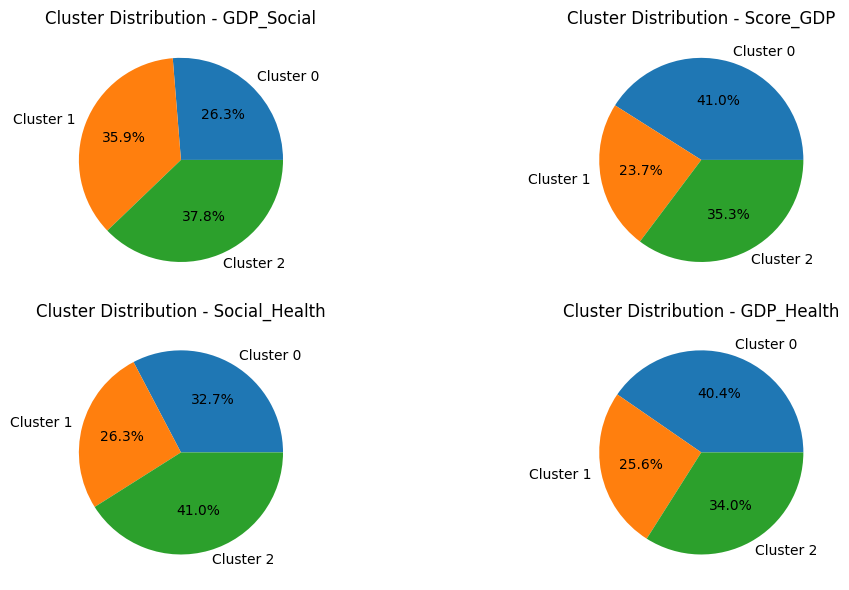

In [61]:
plt.figure(figsize=(12, 6))

for i, (name, info) in enumerate(cluster_results.items(), 1):
    plt.subplot(2, 2, i)
    cluster_sizes = pd.Series(info['clusters']).value_counts().sort_index()
    plt.pie(cluster_sizes, labels=[f'Cluster {j}' for j in range(3)], autopct='%1.1f%%')
    plt.title(f'Cluster Distribution - {name}')

plt.tight_layout()
plt.show()

#**Kelompok Negara Yang Ada di Dua Kombinasi Fitur Berbeda**

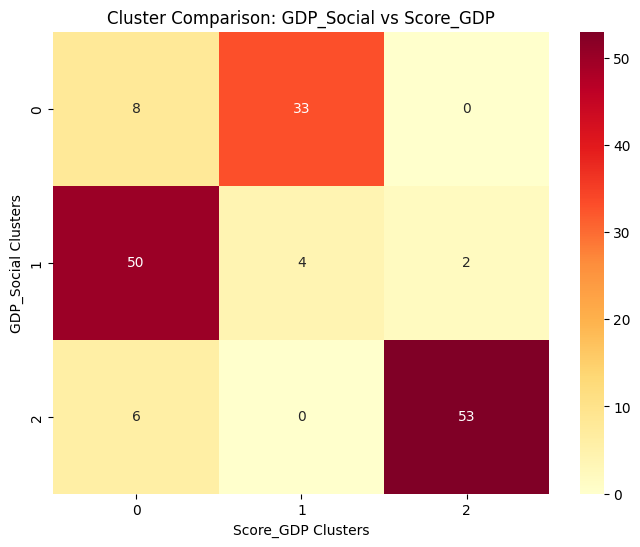

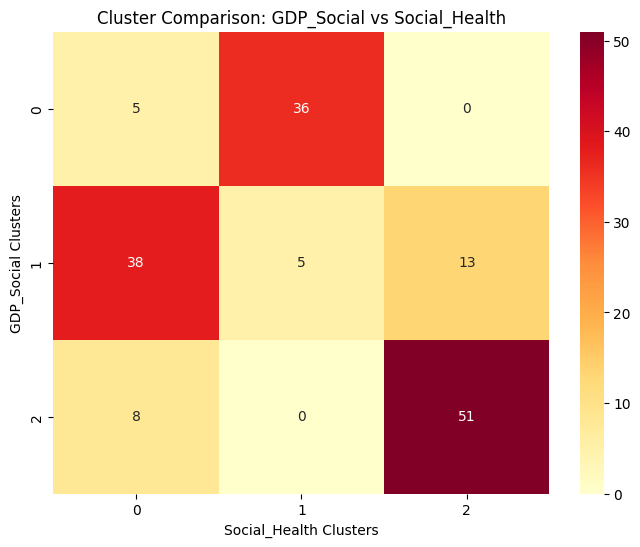

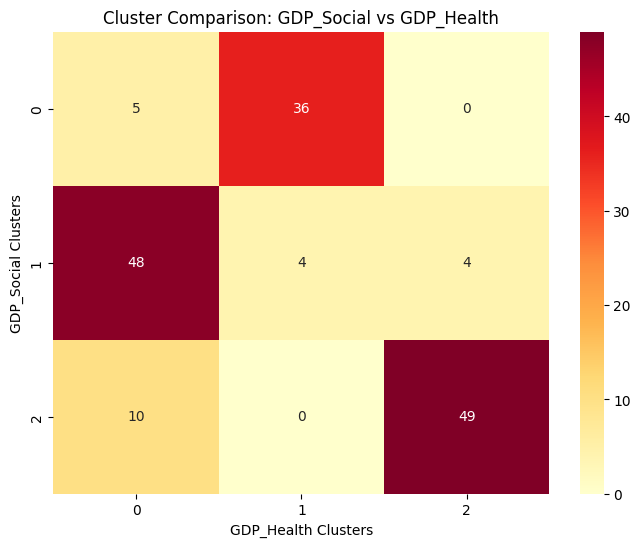

In [62]:
def plot_cluster_comparison(combo1, combo2):
    ct = pd.crosstab(cluster_assignments[combo1], cluster_assignments[combo2])
    plt.figure(figsize=(8, 6))
    sns.heatmap(ct, annot=True, fmt='d', cmap='YlOrRd')
    plt.title(f'Cluster Comparison: {combo1} vs {combo2}')
    plt.xlabel(f'{combo2} Clusters')
    plt.ylabel(f'{combo1} Clusters')
    plt.show()

# Compare first and second clustering
plot_cluster_comparison('GDP_Social', 'Score_GDP')
# Compare first and third clustering
plot_cluster_comparison('GDP_Social', 'Social_Health')
# Compare first and fourth clustering
plot_cluster_comparison('GDP_Social', 'GDP_Health')

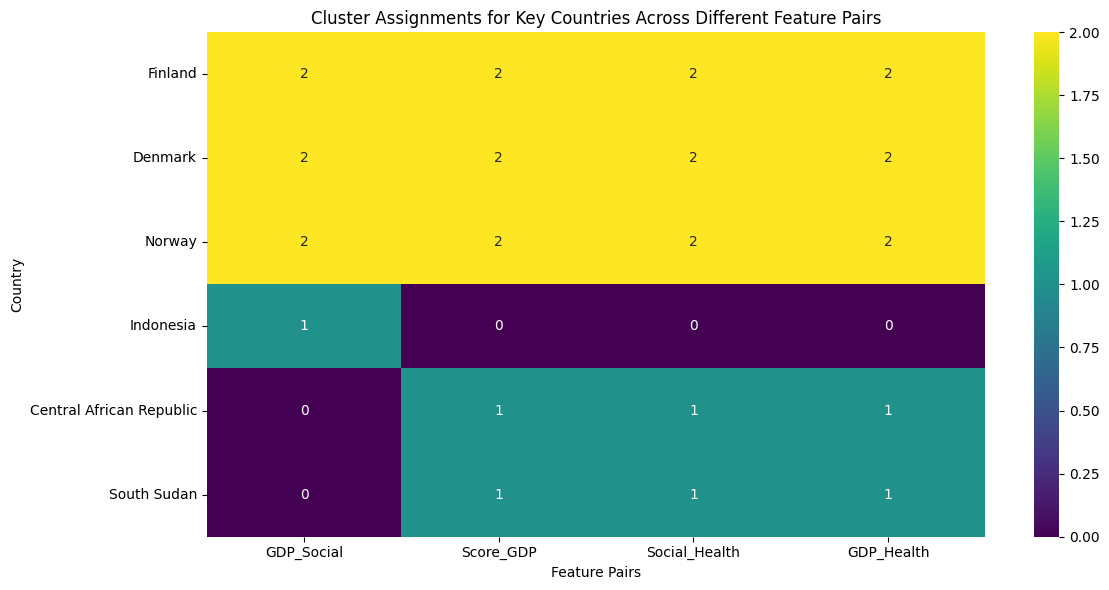

In [63]:
key_countries = ['Finland', 'Denmark', 'Norway', 'South Sudan', 'Central African Republic', 'Indonesia']
key_country_clusters = cluster_assignments[cluster_assignments['Country'].isin(key_countries)]

# Create a heatmap of cluster assignments for key countries
plt.figure(figsize=(12, 6))
key_country_data = key_country_clusters.set_index('Country').iloc[:, :-1]  # Exclude consistency column
sns.heatmap(key_country_data, annot=True, fmt='d', cmap='viridis')
plt.title('Cluster Assignments for Key Countries Across Different Feature Pairs')
plt.ylabel('Country')
plt.xlabel('Feature Pairs')
plt.tight_layout()
plt.show()

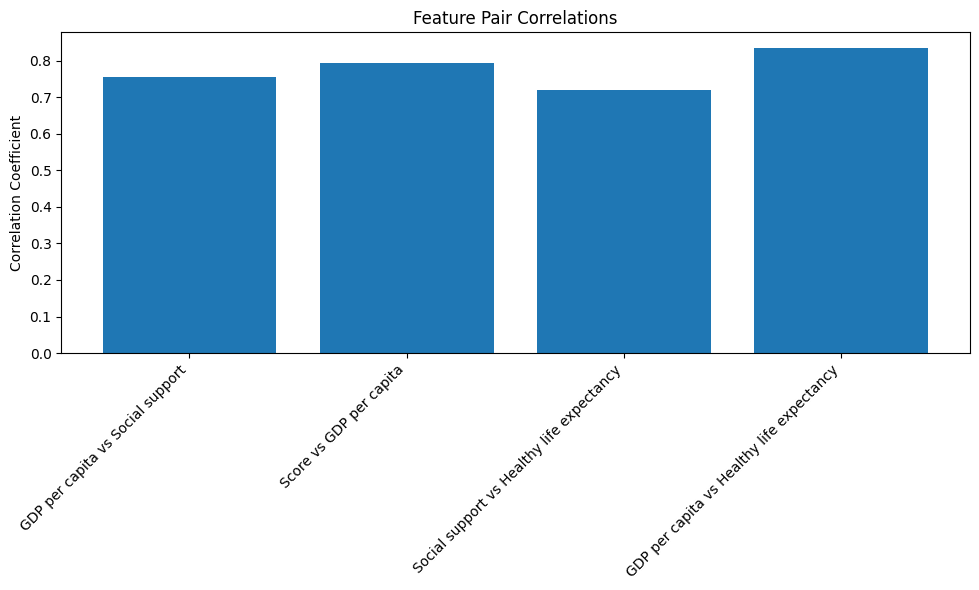


Feature Pair Correlations:
GDP per capita vs Social support: 0.755
Score vs GDP per capita: 0.794
Social support vs Healthy life expectancy: 0.719
GDP per capita vs Healthy life expectancy: 0.835


In [64]:
# Analyze how different feature pairs correlate
feature_pairs = [
    features,    # GDP per capita & Social support
    features2,   # Score & GDP per capita
    features3,   # Social support & Healthy life expectancy
    features4    # GDP per capita & Healthy life expectancy
]

correlations = {}
for pair in feature_pairs:
    corr = df[pair].corr().iloc[0, 1]
    correlations[f'{pair[0]} vs {pair[1]}'] = corr

plt.figure(figsize=(10, 6))
plt.bar(correlations.keys(), correlations.values())
plt.title('Feature Pair Correlations')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

# Print correlation values
print("\nFeature Pair Correlations:")
for pair, corr in correlations.items():
    print(f"{pair}: {corr:.3f}")

In [65]:
for name, info in cluster_results.items():
    print(f"\nSummary Statistics for {name}:")
    cluster_summary = df.groupby(info['clusters'])[info['features']].agg(['mean', 'std']).round(3)
    print(cluster_summary)


Summary Statistics for GDP_Social:
  GDP per capita        Social support       
            mean    std           mean    std
0          0.387  0.212          0.818  0.245
1          0.880  0.178          1.235  0.143
2          1.289  0.153          1.456  0.089

Summary Statistics for Score_GDP:
   Score        GDP per capita       
    mean    std           mean    std
0  5.193  0.584          0.887  0.174
1  4.079  0.551          0.343  0.175
2  6.549  0.603          1.304  0.144

Summary Statistics for Social_Health:
  Social support        Healthy life expectancy       
            mean    std                    mean    std
0          1.223  0.161                   0.721  0.113
1          0.826  0.249                   0.406  0.148
2          1.443  0.097                   0.933  0.099

Summary Statistics for GDP_Health:
  GDP per capita        Healthy life expectancy       
            mean    std                    mean    std
0          0.896  0.173                   0.742  